# Clustering + TSNE en MNIST

### Mónica Ibarra Herrera

In [55]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
digitos = load_digits()

print("Shape de data:", digitos.data.shape)
print("Shape de target:", digitos.target.shape)

Shape de data: (1797, 64)
Shape de target: (1797,)


In [57]:
X = digitos.data

In [58]:
y = digitos.target

In [59]:
num_clases = len(set(digitos.target))
print("Número de clases:", num_clases)

Número de clases: 10


### Visualización de imágenes

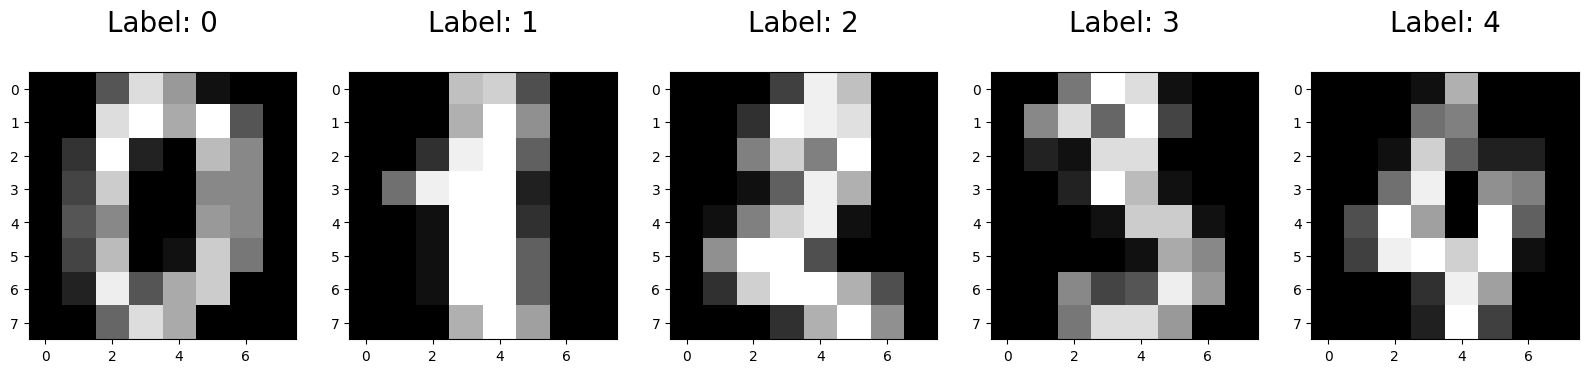

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digitos.data[0:5], digitos.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize=20)

### Normalización de datos

In [61]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Kmeans

In [63]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [69]:
from sklearn.metrics import silhouette_score
# Calcular el coeficiente de silueta para evaluar la calidad de los grupos
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Score siluetas:", silhouette_avg)

Score siluetas: 0.13558208876901615


In [70]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin Score:", davies_bouldin)

Davies-Bouldin Score: 1.8060790632374897


### Visualización de centroides

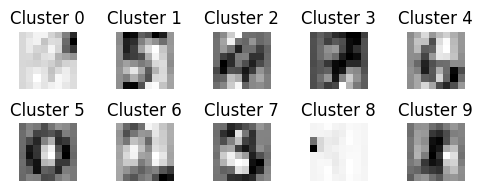

In [71]:
centroids = kmeans.cluster_centers_

num_clusters = len(centroids)
num_cols = 5 
num_filas= (num_clusters + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols, num_filas))
for i, centroid in enumerate(centroids):
    plt.subplot(num_filas, num_cols, i + 1)
    plt.imshow(centroid.reshape(8, 8), cmap='binary')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Implementación TSNE

In [72]:
from sklearn.manifold import TSNE
X = X_scaled
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(1797, 2)

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()

# Agregar los puntos de datos al gráfico
for i in range(10):  # Para cada dígito del 0 al 9
    # Filtrar los puntos de datos correspondientes al dígito actual
    indices = y == i
    x_data = X_embedded[indices, 0]
    y_data = X_embedded[indices, 1]
    
    # Agregar los puntos al gráfico
    fig.add_trace(go.Scatter(
        x=x_data,
        y=y_data,
        mode='markers',
        name=str(i),
        marker=dict(
            size=8,
            opacity=0.8
        )
    ))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='t-SNE Visualization of Handwritten Digits',
    xaxis_title='t-SNE Component 1',
    yaxis_title='t-SNE Component 2',
    showlegend=True
)

# Mostrar la figura interactiva
fig.show()